### Matplotlibによるグラフ描画
- フィギュア：サブプロットを描画する領域
- サブプロット：グラフを描画するための領域

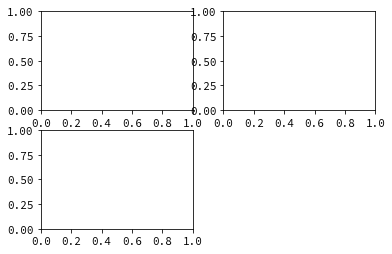

In [2]:
# グラフ準備（丁寧な書き方）
import matplotlib.pyplot as plt

# フィギュアの生成
fig = plt.figure()

# フィギュア内にサブプロットを3つ配置する。
ax1 = fig.add_subplot(221) #2行2列の1番目
ax2 = fig.add_subplot(222) #2行2列の2番目
ax3 = fig.add_subplot(223) #2行2列の3番目

plt.show()

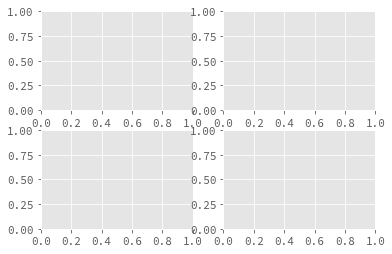

In [18]:
# グラフの準備（簡単な書き方）
fig, axes = plt.subplots(2,2) #2行2列のサブプロットをインスタントに用意する。
plt.show()

In [15]:
# ファイルを出力する。指定できる拡張子は「PNG」「PDF」「PS」「EPS」「SVG」
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [1,3,2]

ax.plot(dat)

fname = 'C:/Users/一起/Desktop/save_fig.png'
plt.savefig(fname, dpi=300, bbox_inches='tight') #dpi=300は解像度の指定、bbox_inchesは余白の設定。

### 棒グラフ: .bar()

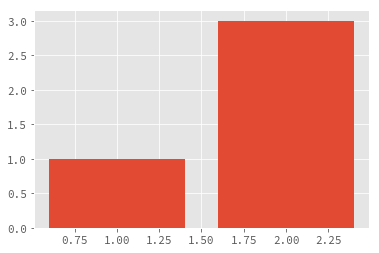

In [2]:
# 棒グラフ
plt.style.use('ggplot') #目盛線を引くスタイル。
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y = [1,3]

ax.bar(x,y) #棒グラフを挿入する。

plt.show()

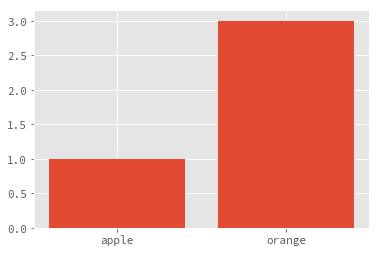

In [3]:
#（書き方1）x軸の目盛ラベルを付与する。
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ['apple', 'orange']
ax.bar(x,y, tick_label=labels) 

plt.show()

In [ ]:
#（書き方2）x軸の目盛ラベルを付与する。
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x,y)

ax.set_xticks(x) #x軸目盛の設定
ax.set_xticklabels(labels) #x軸目盛ラベルの設定

plt.show()

In [3]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

dfac = pd.read_csv(anime_master_csv)

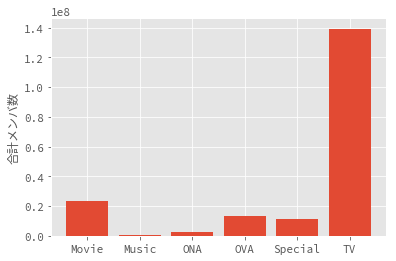

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

y = dfac.groupby('type').sum()['members']
x = range(len(y))

xlabels = y.index
ax.bar(x,y,tick_label=xlabels)
ax.set_ylabel('合計メンバ数')

plt.show()

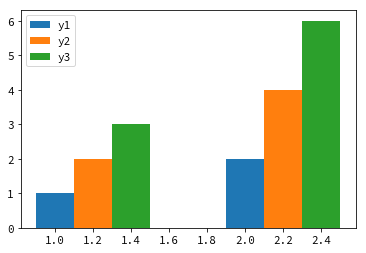

In [4]:
# 複数グループの棒グラフの描画
import numpy as np
x = [1,2]
y1, y2, y3 = [1,2], [2,4], [3,6]

fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x,y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y3')

ax.legend()

plt.show()

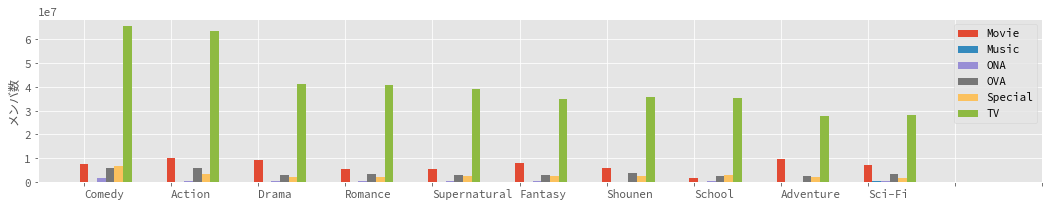

In [39]:
# 複数グループの棒グラフ
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')

fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('メンバ数')
# ax.set_yscale('log') #対数軸にして視認性を高める場合、コメントアウトを外す。
ax.legend()

plt.show()

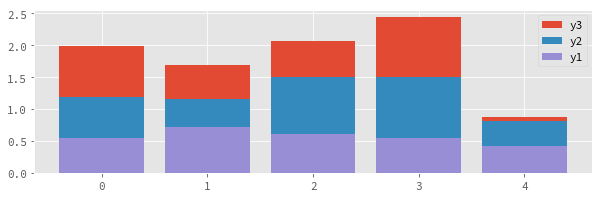

In [46]:
# 積み上げ棒グラフを作成する。
# 後から書いた棒で上書きされる仕様を利用して、先に各項の和を描画し、次に（各項-1）の和を描画し、...を繰り返す。
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))
y1,y2,y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()

plt.show()

In [ ]:
# 3グループ以内なら、もっと楽に積み上げ棒グラフを書く方法がある。：bottom
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3, bottom=y2b, label='y3')
ax.bar(x, y2, bottom=y1b, label='y2')
ax.bar(x, y1, label='y1')

ax.legend()

plt.show()

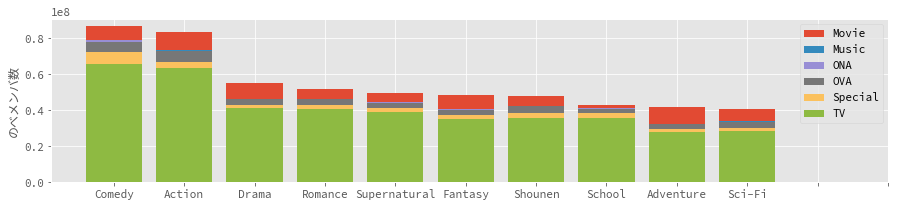

In [50]:
# DataFrameを用いた積み上げ棒グラフの書き方
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    y = dfag.iloc[:, i:cols].sum(axis=1)
    
    ax.bar(x,y,label=t)

ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('のべメンバ数')
ax.legend()
plt.show()

### 折れ線グラフ: .plot()

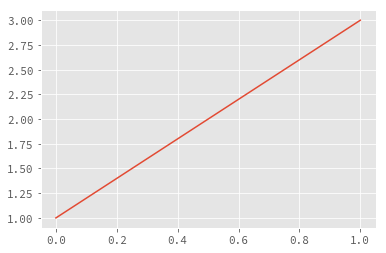

In [7]:
# 折れ線グラフの描画:plot()
# 第一引数がリストひとつの場合、与えられた引数はY値として設定される。X値は自動的にmin=0, max=リストの要素数-1として指定される。
# plot()の引数はリスト以外にも、タプル、ndarray、Seriesが渡せる。これらの型はリストライクオブジェクトと呼ばれることも。
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1,3])
plt.show()

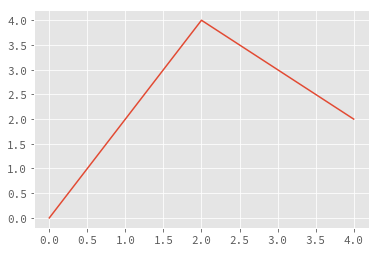

In [10]:
# plot()に複数の引数を渡し、X値とY値を規定する。
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y = [0, 4, 2]
ax.plot(x,y)
plt.show()

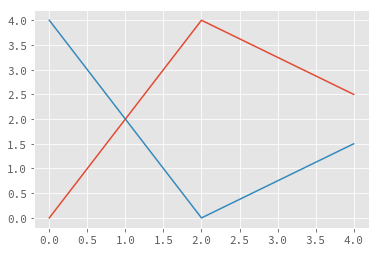

In [11]:
# 複数の線を描画する。同じサブプロットに2回グラフを描画すればよい。

fig = plt.figure()
ax = fig.add_subplot(111)

x = [0,2,4]
y1 = [0, 4, 2.5]
y2 = [4, 0, 1.5]

ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

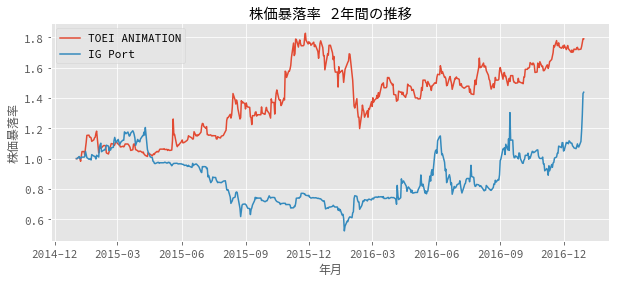

In [13]:
# 時系列データの描画に適しているのは折れ線グラフ
anime_stock_returns_csv = os.path.join(base_url, 'anime_stock_returns.csv')
df = pd.read_csv(anime_stock_returns_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.plot(df.index, df['TOEI ANIMATION'], label='TOEI ANIMATION')
ax.plot(df.index, df['IG Port'], label='IG Port')

ax.set_title('株価暴落率 2年間の推移')
ax.set_xlabel('年月')
ax.set_ylabel('株価暴落率')
ax.legend()

plt.show()

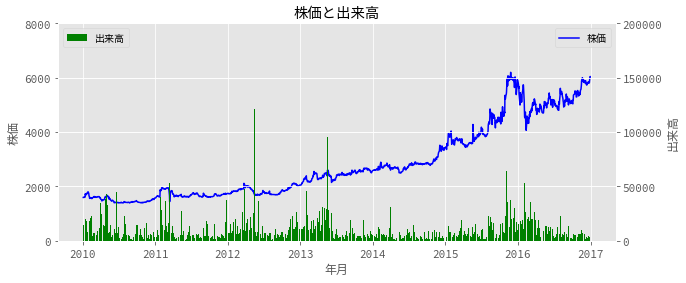

In [14]:
# X軸を共有しY軸を2つ設定する方法（折れ線と棒グラフ）
t4816_csv = os.path.join(base_url, '4816.csv')
df = pd.read_csv(t4816_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)

ax1.plot(df.index, df['Close'], color='b', label='株価')

# X軸を共有しY軸を2つ使用する設定
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='出来高', width=2)

ax1.set_yticks([i * 2000 for i in range(5)])
ax1.set_ylabel('株価')
ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('出来高')
ax1.set_xlabel('年月')
ax1.set_title('株価と出来高')
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

### 散布図: .scatter()

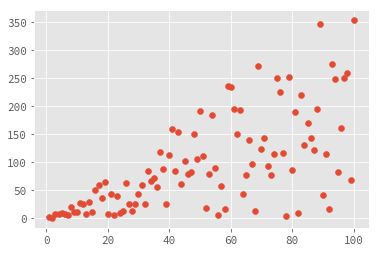

In [16]:
# 散布図を作成する。:scatter()
np.random.seed(2)

x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y)
plt.show()

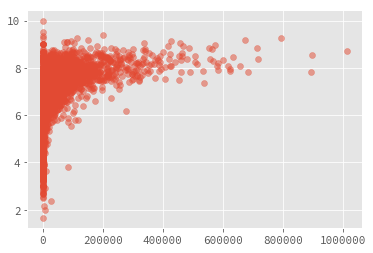

In [9]:
df = pd.read_csv(anime_master_csv, index_col='anime_id')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['members'], df['rating'], alpha=0.5)
plt.show()

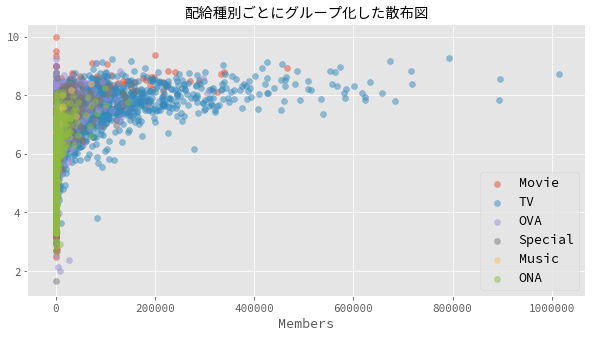

In [23]:
# 超重要
# ラベル毎に散布図を描画する
types = df['type'].unique()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type'] == t, 'members']
    y = df.loc[df['type'] == t, 'rating']
    ax.scatter(x, y, alpha=0.5, label=t)

ax.set_title('配給種別ごとにグループ化した散布図')
ax.set_xlabel('Members')
ax1.set_ylabel('Rating')
ax.legend(loc='lower right', fontsize=12)

plt.show()

### ヒストグラム: .hist()

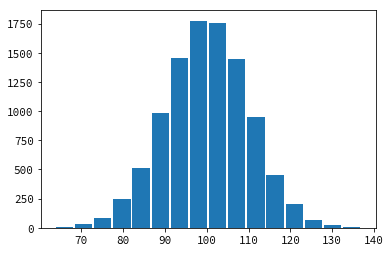

In [5]:
# ヒストグラムを作成する
mu = 100 #平均値
sigma = 10 #標準偏差
np.random.seed(10)

x = np.random.normal(mu, sigma, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)
plt.show()

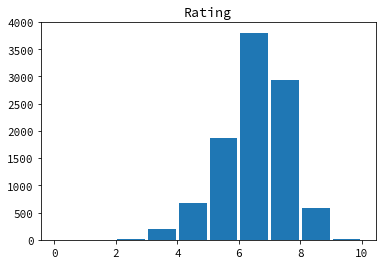

In [6]:
# DataFrameを利用したヒストグラム
df = pd.read_csv(anime_master_csv, index_col='anime_id')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')
plt.show()

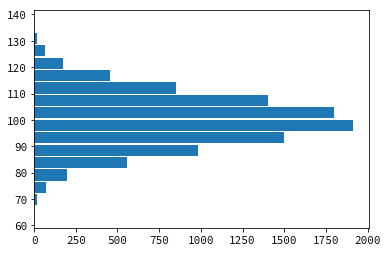

In [11]:
# 横向きのヒストグラム
np.random.seed(0)
x = np.random.normal(100, 10, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')
plt.show()

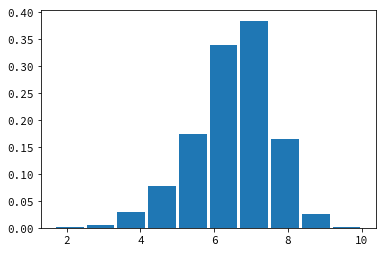

In [12]:
# 相対度数表示
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], normed=True, rwidth=0.9)
plt.show()

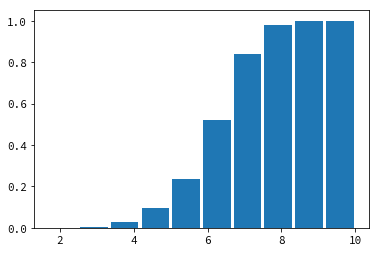

In [13]:
# 累積度数図
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], normed=True, cumulative=True, rwidth=0.9)
plt.show()

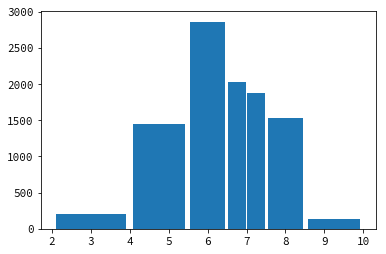

In [15]:
# 階級幅の変更
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)
plt.show()

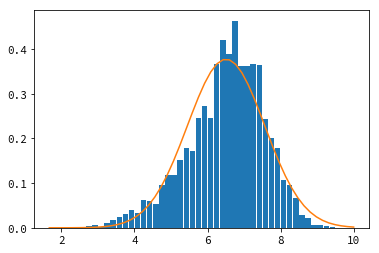

In [16]:
# 近似曲線の追加
bins = 50
dfmin = np.min(df['rating'])
dfmax = np.max(df['rating'])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=bins, range=(dfmin,dfmax), normed=True, rwidth=0.9)

mu, sigma = df['rating'].mean(), df['rating'].std()

x = np.linspace(dfmin, dfmax, bins) #ビンの区切りの値

# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax.plot(x,y)

plt.show()

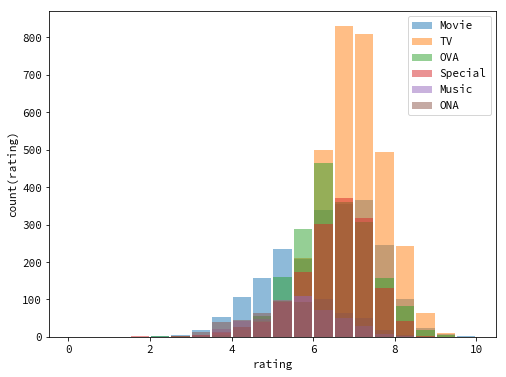

In [19]:
# 複数グループを重ねて表示
types = df['type'].unique()
labels = types.tolist() #tolist()は便利

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type']==t, 'rating'],  #この書き方重要
            bins=b_num,
            rwidth=0.9,
            alpha=0.5, #不透明度を下げる。0のとき透明。1のとき不透明。
            label=t)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('count(rating)')

plt.show()

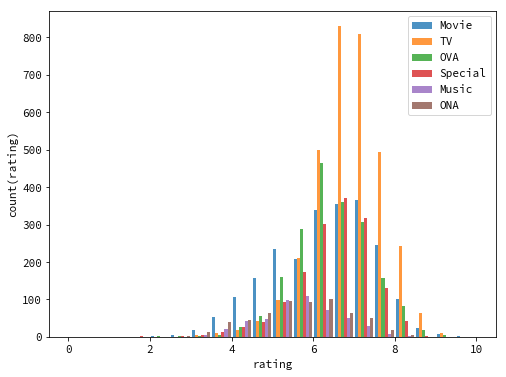

In [25]:
# 複数グループを並べて描画
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

ax.hist(dataset,
        bins=b_num,
        rwidth=0.9,
        alpha=0.8, #不透明度を下げる。0のとき透明。1のとき不透明。
        label=labels)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('count(rating)')

plt.show()

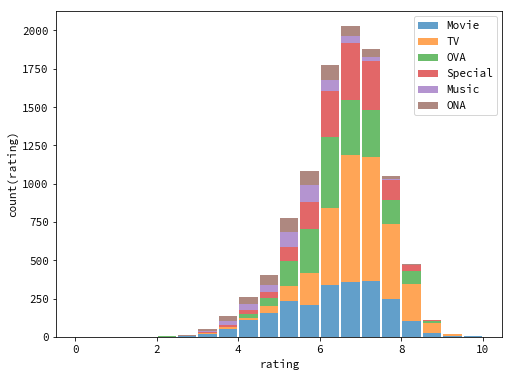

In [26]:
# 複数グループを積み上げて描画
# 全体の分布とその内訳を確認する場合に有効
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(dataset,
        bins=b_num,
        rwidth=0.9,
        alpha=0.7, #不透明度を下げる。0のとき透明。1のとき不透明。
        label=labels,
        stacked=True)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('count(rating)')

plt.show()

### 箱ひげ図 .boxplot()

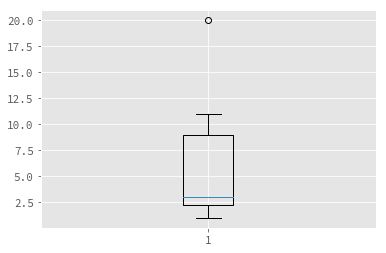

In [5]:
# 箱ひげ図の描画
# 箱の範囲がIQR。つまり、（第3四分位点-第1四分位点）
# 〇は外れ値である。
plt.style.use('ggplot')

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)
plt.show()

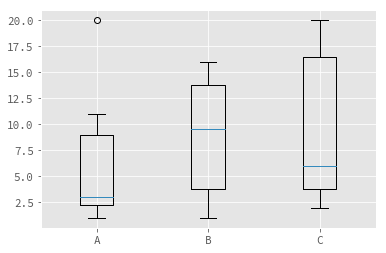

In [8]:
# 複数の箱ひげ図の描画
# リストのリストを使う。リスト内リストの数分箱ひげ図ができる。
x = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10, 15, 16], [2, 3, 6, 6, 20, 20]]
labels = ['A', 'B', 'C']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x, labels=labels)
plt.show()

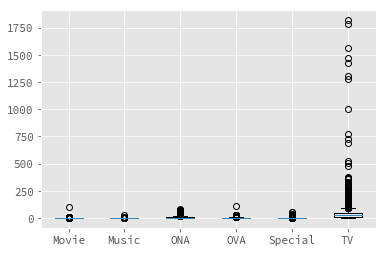

In [13]:
# 重要
# DataFrameの特定カラムの要素毎に集計しつつ、箱ひげ図にまとめる。
df = pd.read_csv(anime_master_csv, index_col='anime_id')

labels = []
types_list = []

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
plt.show()

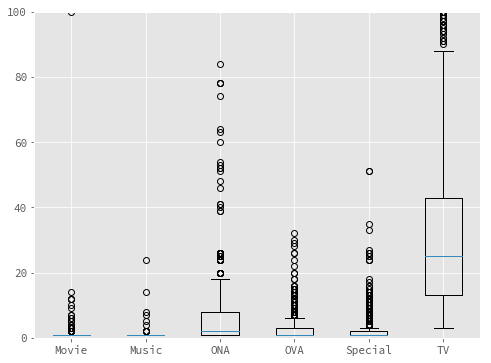

In [14]:
# 箱ひげ図の範囲を指定する。
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)

ax.set_ylim(0, 100)

plt.show()

In [15]:
# 箱ひげ図の箱の具体的な値を知りたい時は、describe()メソッドが便利。
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

In [28]:
# 箱ひげ図の書式を一括設定する。

# 外れ値の書式辞書
flierprop = {'color': '#EC407A', #色
             'marker': 'o',
             'markerfacecolor': '#2196F3', #マーカーの塗りつぶし色
             'markeredgecolor': 'white',  #マーカーの枠線の色
             'markersize': 5,
             'linestyle': 'None',  #線種
             'linewidth': 0.1}
# 箱の書式辞書
boxprop = {'color': '#2196F3', 
           'facecolor': '#BBDEFB',  #塗りつぶし色
           'linewidth': 1,
           'linestyle': '-'}
# ヒゲの書式辞書
whiskerprop = {'color': '#2196F3', 
               'linewidth': 1,
               'linestyle': '--'}
# ヒゲ末端キャップの書式辞書
capprop = {'color': '#2196F3', 
           'linewidth': 1,
           'linestyle': ':'}
# 中央値の書式辞書
medianprop = {'color': '#2196F3', 
              'linewidth': 2,
              'linestyle': '-'}
# 平均値の書式辞書
meanprop = {'color': '#2196F3',
            'marker': '^',
            'markerfacecolor': '#2196F3',
            'markeredgecolor': 'white', 
            'markersize': 10,
            'linewidth': 1, 
            'linestyle': ''}

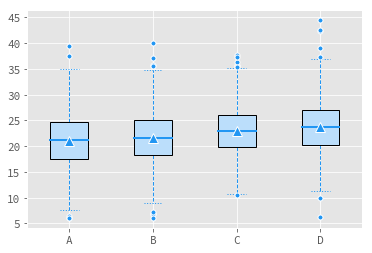

In [23]:
# 書式変更した例
# データの準備
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1, 5)]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(
    dataset,
    patch_artist='Patch', #書式設定する場合はPatchを選択
    labels=['A', 'B', 'C', 'D'],
    showmeans=True, #平均値を描画する。▲がそれ。
    flierprops=flierprop,
    boxprops=boxprop,
    whiskerprops=whiskerprop,
    capprops=capprop,
    medianprops=medianprop,
    meanprops=meanprop)

plt.show()


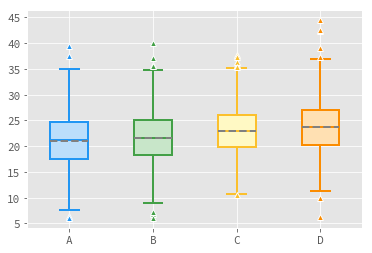

In [27]:
# ボックス毎に書式を設定する
fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(dataset, patch_artist='Patch', labels=['A', 'B', 'C', 'D'], meanline=True, showmeans=True)

colors1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']

# 上下に分かれた要素に設定するための用の数列
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 箱と外れ値、中央値の書式設定
for params in zip(bp['boxes'],
                  bp['fliers'],
                  bp['medians'],
                  colors1,
                  colors2):   
    bpb, bpf, med, color1, color2 = params
    
    #箱の書式
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    #外れ値の書式
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor('white')
    bpf.set_markerfacecolor(color1)
    
    #中央値の書式
    med.set_color(color1)
    med.set_linewidth(2)

# ヒゲとヒゲ末端キャップの書式設定
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)

# 平均値の書式設定
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')

plt.show()